In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def f(x):
    return 3*x**2

In [5]:
f(2.0)

12.0

In [8]:
xs = np.arange(-5, 5, 0.25)

In [9]:
ys = f(xs)

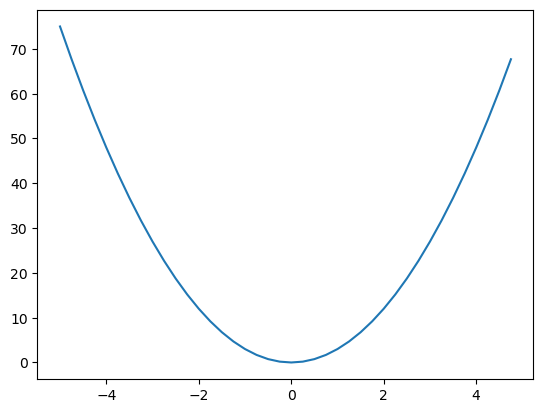

In [11]:
plt.plot(xs, ys)

In [18]:
h = 0.00000001
x = -3.0
(f(x + h) - f(x)) / h

-18.000000068241206

In [31]:
class Value:
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out;
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
a = Value(2.0)
b = Value(-3.0)
c = Value(10)
d = a * b + c
d

Value(data=4.0)

In [33]:
d._prev

{Value(data=-6.0), Value(data=10)}

In [35]:
from graphviz import Digraph

ModuleNotFoundError: No module named 'graphviz'